In [7]:
import pandas as pd
df = pd.read_csv('sales_data_sample.csv', encoding='latin1', parse_dates=['ORDERDATE'])
print(df.head())

daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

daily_sales.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'}, inplace=True)


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

   ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0 2003-02-24  Shipped       1         2     2003  ...   
1 2003-05-07  Shipped       2         5     2003  ...   
2 2003-07-01  Shipped       3         7     2003  ...   
3 2003-08-25  Shipped       3         8     2003  ...   
4 2003-10-10  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN          Reims   NaN   
2  27 rue d

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoivcmew7/f4xshv38.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoivcmew7/pqypfxnn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33948', 'data', 'file=/tmp/tmpoivcmew7/f4xshv38.json', 'init=/tmp/tmpoivcmew7/pqypfxnn.json', 'output', 'file=/tmp/tmpoivcmew7/prophet_modeljwcbzjoe/prophet_model-20250520085351.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:53:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:53:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


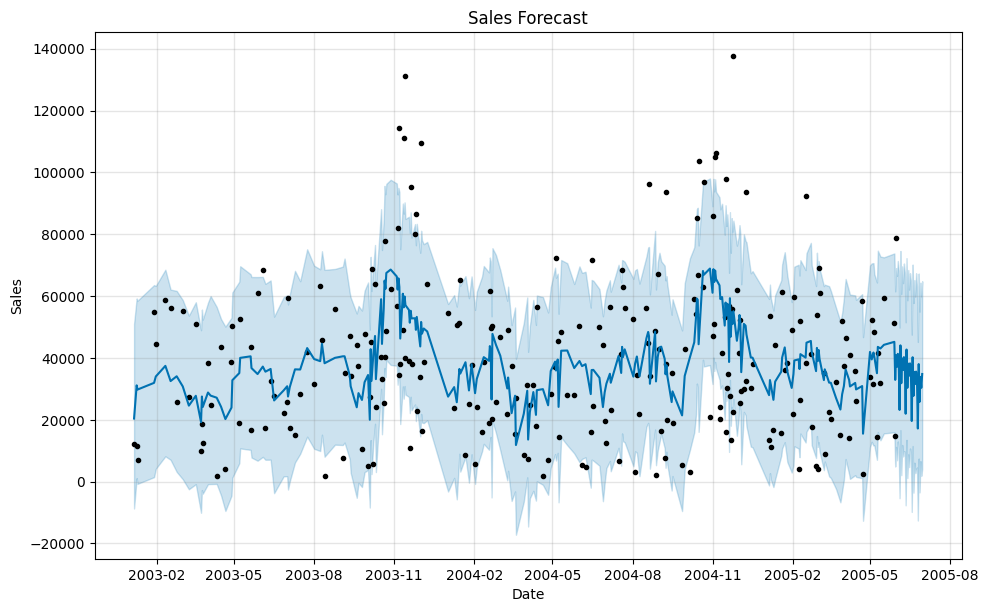

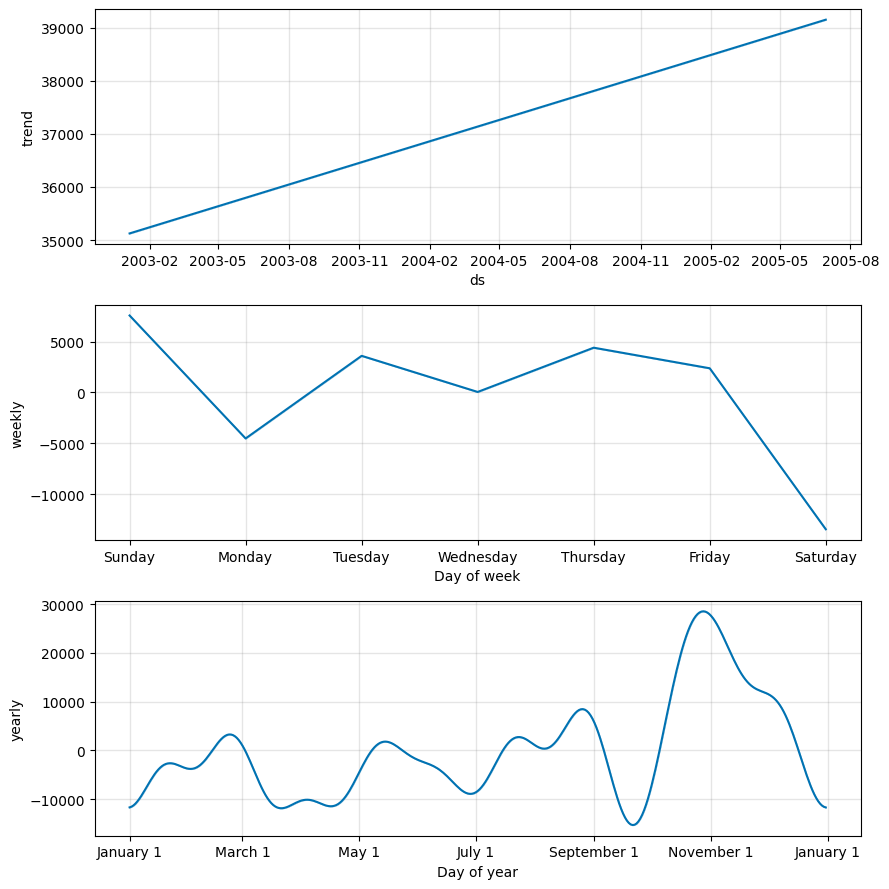

In [4]:
from prophet import Prophet
import matplotlib.pyplot as plt

model = Prophet()
model.fit(daily_sales)

future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

model.plot(forecast)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

model.plot_components(forecast)
plt.show()


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

merged = pd.merge(daily_sales, forecast[['ds', 'yhat']], on='ds', how='inner')

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')




MAE: 18205.560264072486
RMSE: 22761.859436070063
